In [10]:
import pandas as pd
solar_data = pd.read_csv('solarpower.csv')
solar_data

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


In [11]:
for index in range(len(solar_data['cum_power'])):
    if solar_data['cum_power'][index] == -1:
        solar_data['cum_power'][index] = (solar_data['cum_power'][index-1]+solar_data['cum_power'][index+1])/2
print(round(solar_data['cum_power'].mean()))

23848


C:\Users\spbda\AppData\Local\Temp\ipykernel_5908\3836435241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cum_power'][index] = (solar_data['cum_power'][index-1]+solar_data['cum_power'][index+1])/2
C:\Users\spbda\AppData\Local\Temp\ipykernel_5908\3836435241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cum_power'][index] = (solar_data['cum_power'][index-1]+solar_data['cum_power'][index+1])/2


In [24]:
solar_data['date'] = pd.to_datetime(solar_data['date'], dayfirst=False)
solar_data['day_power'] = solar_data['cum_power'].diff(periods=1)
mean_month = solar_data.groupby(solar_data['date'].dt.to_period('M'))['day_power'].mean()
print(mean_month)


date
2017-01     3.233333
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64


In [27]:
import plotly
import plotly.express as px
fig = px.histogram(
    data_frame=mean_month,
    y='day_power'
)
fig.show()

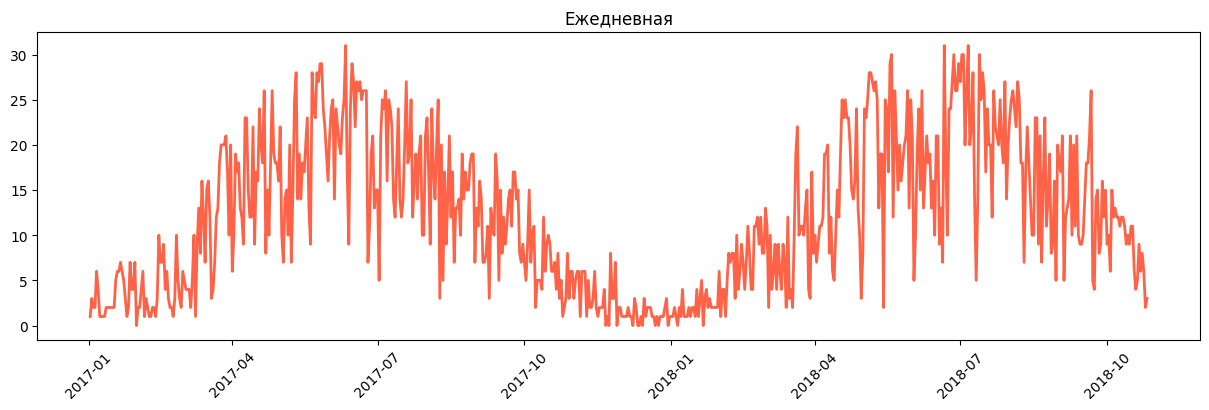

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, figsize=(15, 4))
axes.plot(
    solar_data["date"],
    solar_data["day_power"],
    color="tomato",
    lw=2,
)
axes.set_title("Ежедневная")
axes.xaxis.set_tick_params(rotation=45)